In [96]:
#Import Pandas Libraries
import pandas as pd


In [97]:
# Load and Explore Data
dataset=pd.read_csv('insurance_pre.csv')

In [98]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [99]:
# One-hot encoding on categorical variables in a dataset and one of the dummy columns will be dropped 
dataset=pd.get_dummies(dataset,drop_first=True)

In [100]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [101]:
#It will be a list containing the column names of your dataset
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [102]:
# Input Data Preprocess 
indepentent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]

In [103]:
# Output Data Preprocess 
depentent=dataset[['charges']]

In [104]:
#Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(indepentent,depentent,test_size=0.30, random_state=0)



In [105]:
#Create the Train the Model
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='friedman_mse', splitter='random', max_features='auto')
regressor=regressor.fit(X_train,y_train)

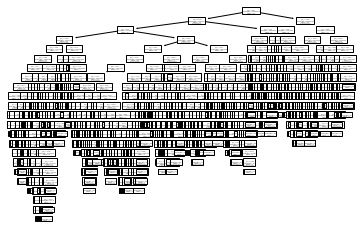

In [106]:
#Visualize the decision tree using plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [107]:
# Evaluate the Input test data
y_pred=regressor.predict(X_test)

In [108]:
# Evaluate the Model
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [109]:
r_score

0.7176676654696019